# 3-D Simulation Path Plots 
- X: number of Monte Carlo Simulations
- Y: Degreee of polynomial
- Z: Error (Absolute Difference with Binomial Convergence)

In [2]:
options(scipen = 999)
source("Functions.R") # Import the functions from the Functions.R file

In [3]:
# Fixed parameters 
K = 931.8 # At the money strike 
M = 50 # Number of time steps 
r = 0.005290473
S0 = 931.8 
sigma = 0.01026789

In [4]:
list_of_polynomials = c(Y ~ X + I(X^2), 
                    Y ~ X + I(X^2) + I(X^3),
                    Y ~ X + I(X^2) + I(X^3) + I(X^4),
                    Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5),
                    Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6), 
                    Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7),
                    Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8),
                    Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9)
                    )
list_of_N_values <- c(1000,5000,10000,50000,100000,500000,1000000) # Number of paths to simulate

In [5]:
df <- data.frame(N = integer(), Price = numeric(), Polynomial = integer())

for (i in seq_along(list_of_polynomials)) {
  current_degree <- i + 1  
  polynomial <- list_of_polynomials[[i]]
  
  for (N in list_of_N_values) {
    price <- price_american_put_longstaff_schwartz_MC(
      K = K, M = M, N = N, r = r, S0 = S0, sigma = sigma, polynomial = polynomial
    )
    df <- rbind(df, data.frame(N = N, Price = price, Polynomial = current_degree))
  }
}
df$Error <- abs(df$Price - 2.32429) # Price from Binomial Tree Convergence

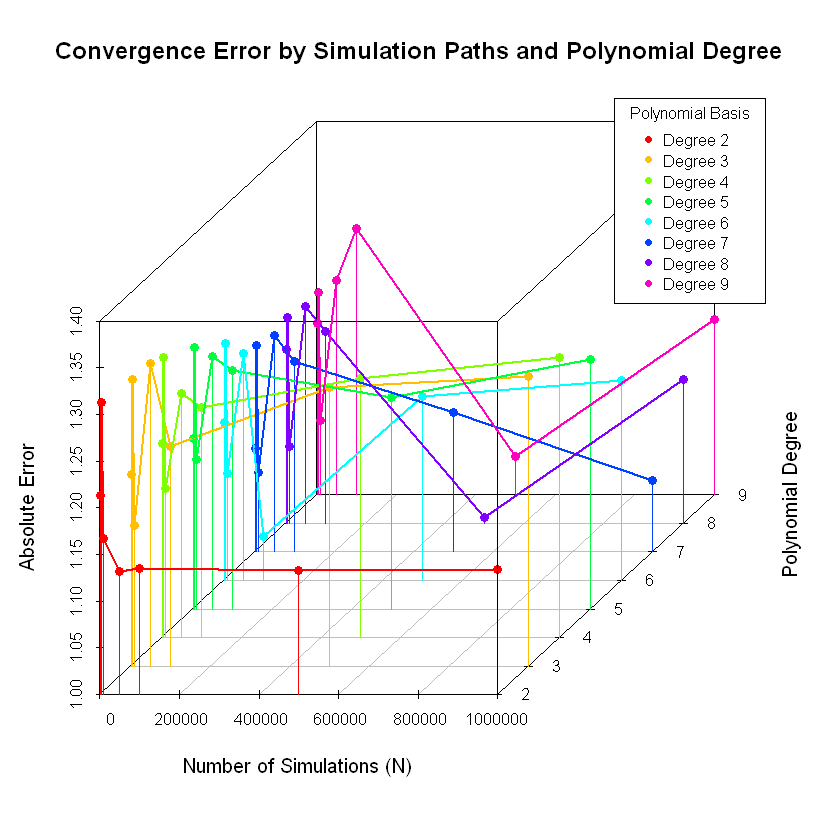

In [6]:
library(scatterplot3d)

degree_colors <- rainbow(length(unique(df$Polynomial)))
df$color <- degree_colors[as.factor(df$Polynomial)]

s3d <- scatterplot3d(df$N, df$Polynomial, df$Error,
              color = df$color,
              pch = 16,
              main = "Convergence Error by Simulation Paths and Polynomial Degree",
              xlab = "Number of Simulations (N)",
              ylab = "Polynomial Degree",
              zlab = "Absolute Error",
              type = "h",  
              grid = TRUE,
              angle = 55)

for (degree in unique(df$Polynomial)) {# Connect points of the same polynomial degree
  subset <- df[df$Polynomial == degree,]
  s3d$points3d(subset$N, subset$Polynomial, subset$Error, 
               type = "l", col = subset$color, lwd = 2)
}

legend("topright", # Add legend 
       legend = paste("Degree", unique(df$Polynomial)),
       pch = 16, 
       col = degree_colors,
       title = "Polynomial Basis",
       cex = 0.8)

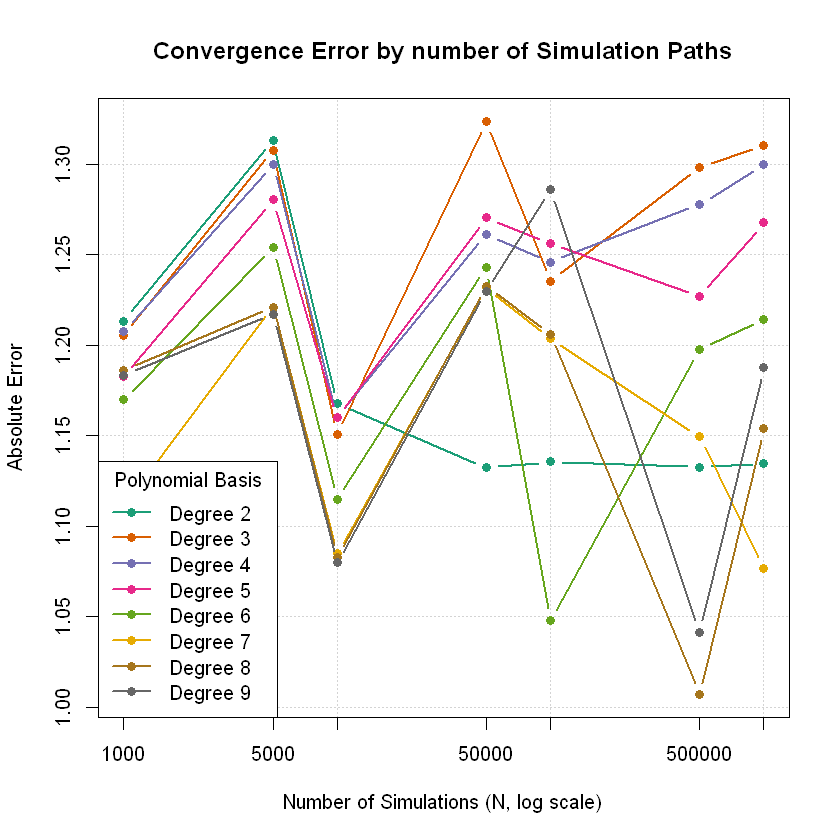

In [7]:
library(RColorBrewer)
degree_colors <- brewer.pal(length(unique(df$Polynomial)), "Dark2")
plot(NA, 
     xlim = range(df$N), 
     ylim = range(df$Error),
     log = "x",  
     main = "Convergence Error by number of Simulation Paths",
     xlab = "Number of Simulations (N, log scale)",
     ylab = "Absolute Error",
     panel.first = grid())
for (i in seq_along(unique(df$Polynomial))) {# Connect points of the same polynomial degree
  degree <- unique(df$Polynomial)[i]
  subset <- df[df$Polynomial == degree,]
  lines(subset$N, subset$Error, 
        col = degree_colors[i], 
        lwd = 2, 
        type = "b",  
        pch = 16)
}
legend("bottomleft", # Add legend 
       legend = paste("Degree", unique(df$Polynomial)),
       col = degree_colors,
       lwd = 2,
       pch = 16,
       title = "Polynomial Basis",
       bg = "white")

In [9]:
write.csv(df, "Data/ConvergenceErrorByNumberofSimPaths.csv", row.names = FALSE) # Save the data frame to a CSV file